Klaudia Stec, 
Monte Carlo: Estymacja liczby $\pi$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
random.seed(42)

In [2]:
N = 10000
rep = 10

points_inside = []
points_outside = []
# series of approximation
data_series = []

for i in range(rep):
    # approximation in one repetition
    pi_approx = []
    inside = []
    outside = []
    k = 0
    for n in range(1, N):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if y <= math.sqrt(1 - x * x):
            k += 1
            inside.append((x, y))
        else:
            outside.append((x, y))
        pi_approx.append(4 * k / n)
    data_series.append(np.array(pi_approx))
    points_inside.append(inside)
    points_outside.append(outside)

Analizę rozpoczynam od przygotowania danych. Zbieram serie dziesięciu zestawów danych dla: punktów na zewnątrz okręgu, punktów wewnątrz okręgu oraz estymowanych wartości liczby &pi;. Zgodnie z algorytmem Monte Carlo, jeśli punkt należy do okręgu, to inkrementuje $k$. Statystycznie obliczając stosunek pola ćwiartki do kwadratu wyznaczam liczbę &pi;. $$ \pi = 4 * k / n $$Powyższy stosunek należy jeszcze pomnożyć przez 4, ponieważ liczyłam $n$ i $k$ tylko dla jednej ćwiartki.
Zaczęłam od $n = 1$, aby nie sprawdzać każdorazowo warunku: $n != 0$.

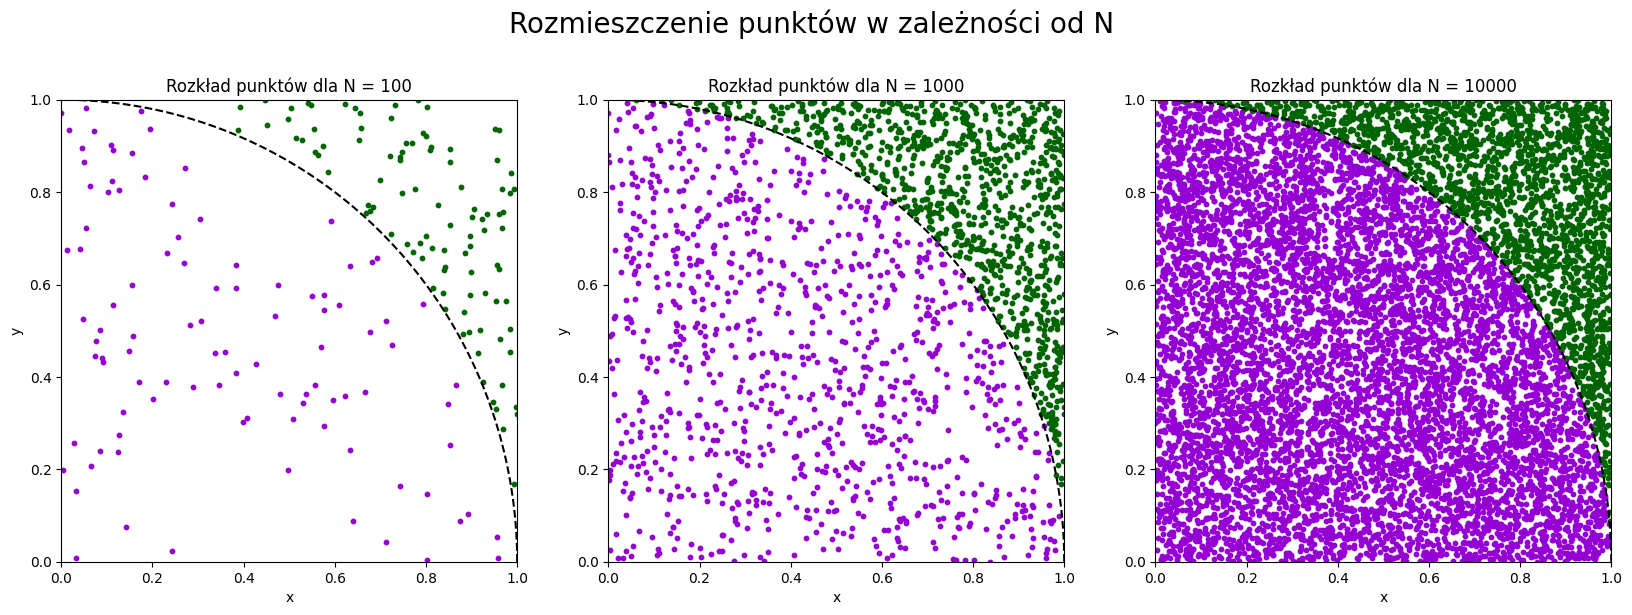

In [3]:
fig, axs = plt.subplots(1, 3, figsize = (20, 6))
plt.suptitle("Rozmieszczenie punktów w zależności od N", size = 20, y=1.03)
theta = np.linspace(0, np.pi/2, 100)
n = 100
for ax in axs:
    ax.scatter(*zip(*points_inside[3][0:n]), color='darkviolet', label='Inside Circle', s=10)
    ax.scatter(*zip(*points_outside[3][0:n]), color='darkgreen', label='Outside Circle', s=10)
    ax.set_title(f'Rozkład punktów dla N = {n}')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.plot(np.cos(theta), np.sin(theta), color='black', linewidth=1.5, linestyle='--')
    n *= 10
plt.show()

Powyższe wykresy to rozkład punktów w obrębie koła i poza nim dla jednego z zestawu danych. Współrzędne zostały wylosowane z rozkładu równomiernego. Oczywiście, wraz ze wzrostem liczby punktów, układ zostaje coraz bardziej zapełniony, więc też przybliżenie będzie dokładniejsze.

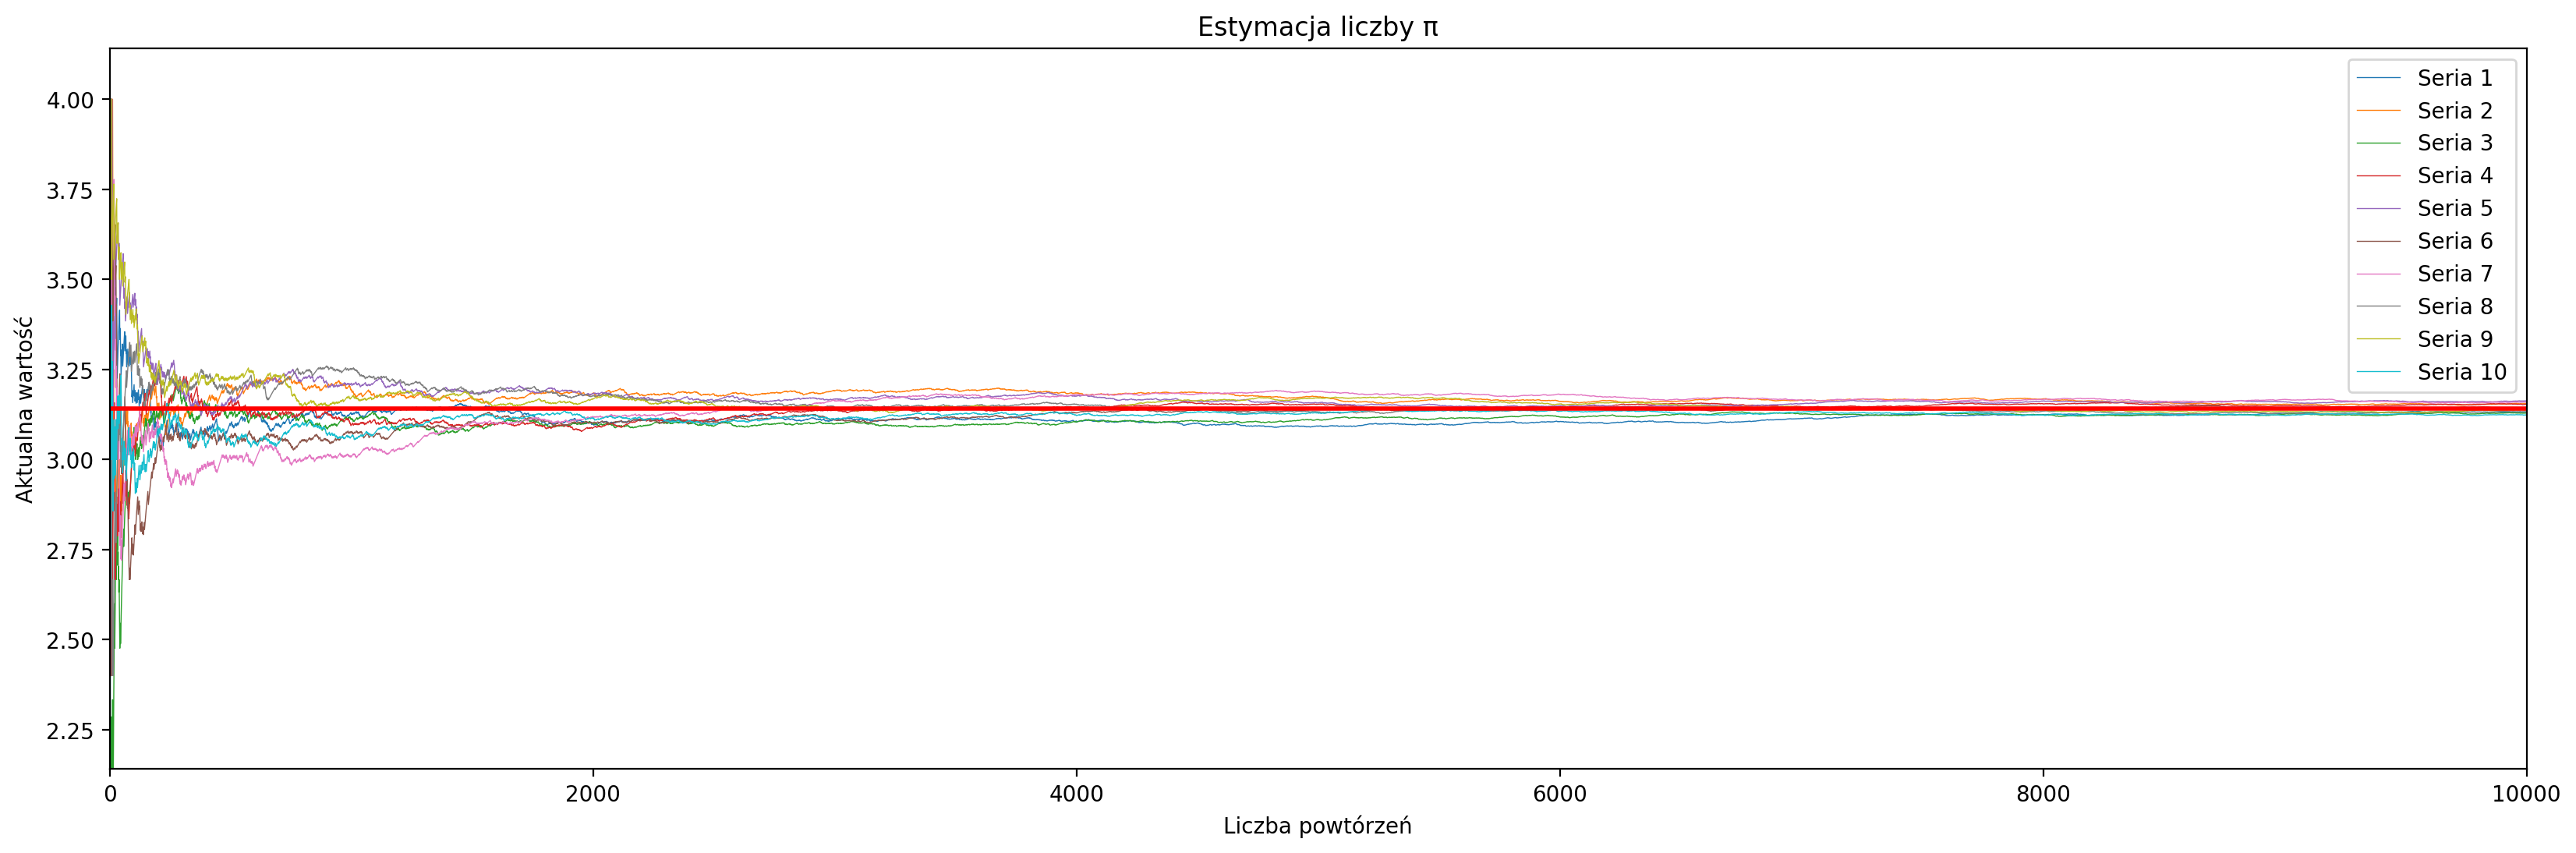

In [4]:
fig, ax = plt.subplots(figsize = (20, 6), dpi=200)
i = 1
for serie in data_series:
    ax.plot(range(1, N), serie, linewidth=0.5, label=f'Seria {i}')
    i += 1

ax.axhline(y=np.pi, color='red', linewidth=2)
ax.set_ylim(np.pi - 1, np.pi + 1)
ax.set_xlim(0, N)
ax.legend(loc='upper right') 
ax.set_xlabel("Liczba powtórzeń")
ax.set_ylabel("Aktualna wartość")
ax.set_title("Estymacja liczby π")
plt.show()

Dla każdej serii widać, jak zmieniają się estymowane wartości i zmierzają do liczby $\pi$. Tylko na początku mamy duże zmiany. Wynikają one z różnicy, który właśnie na początku może być duża przez losowość (pseudolosowość) algorytmu i dopiero z kolejnymi próbami się normuje. 

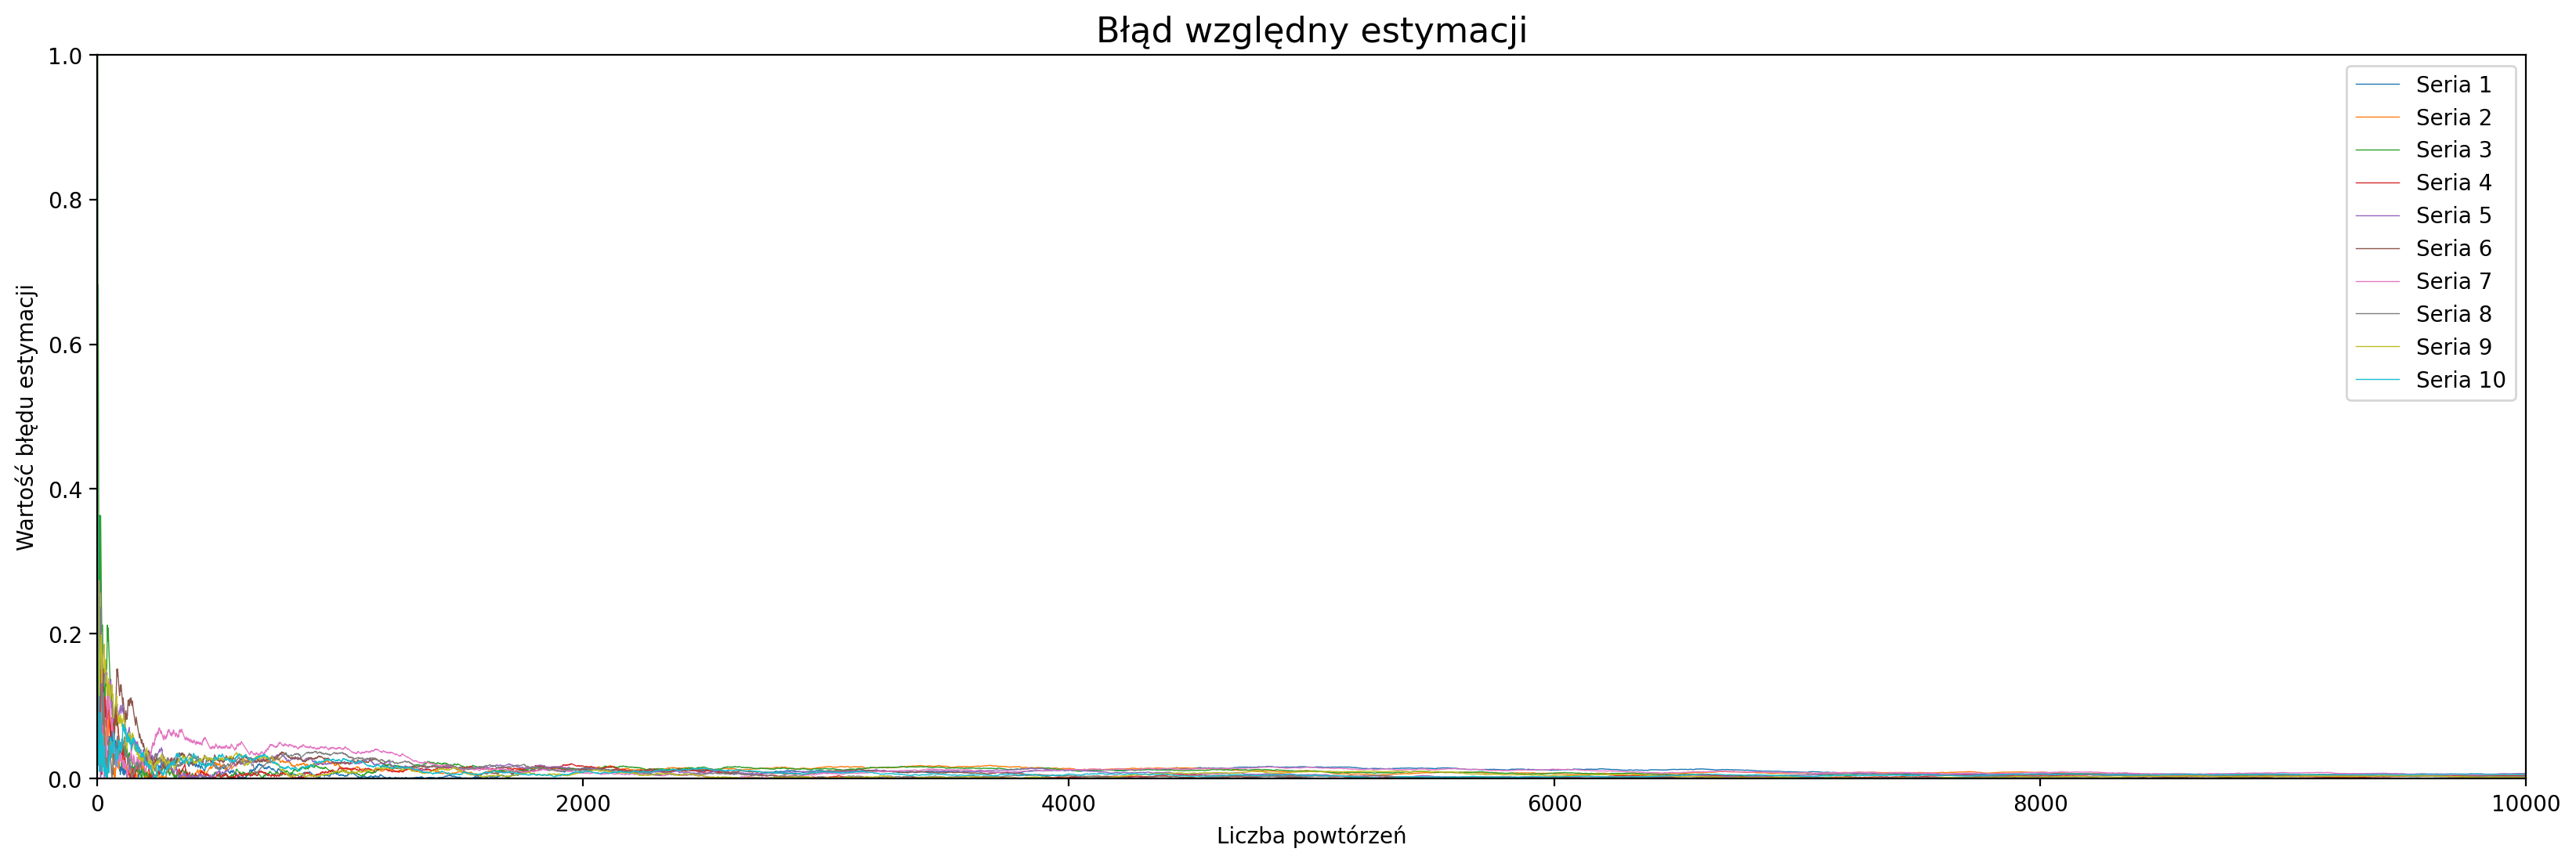

In [5]:
pi_error = abs(np.array(data_series) - np.pi) / np.pi
fig, ax = plt.subplots(figsize = (20, 6), dpi=200)
i = 1
for serie in pi_error:
    ax.plot(serie, label=f'Seria {i}', linewidth=0.5)
    i += 1
ax.legend(loc='upper right') 
ax.set_xlabel("Liczba powtórzeń")
ax.set_ylabel("Wartość błędu estymacji")
ax.set_title("Błąd względny estymacji", size=16)
ax.set_xlim(0, N)
ax.set_ylim(0, 1)
plt.show()

Powyższy wykres ukazuje wykładniczy charakter zmniejszania się błędu estymacji, co zostało zauważone już powyżej. Wykresy się pokrywają.

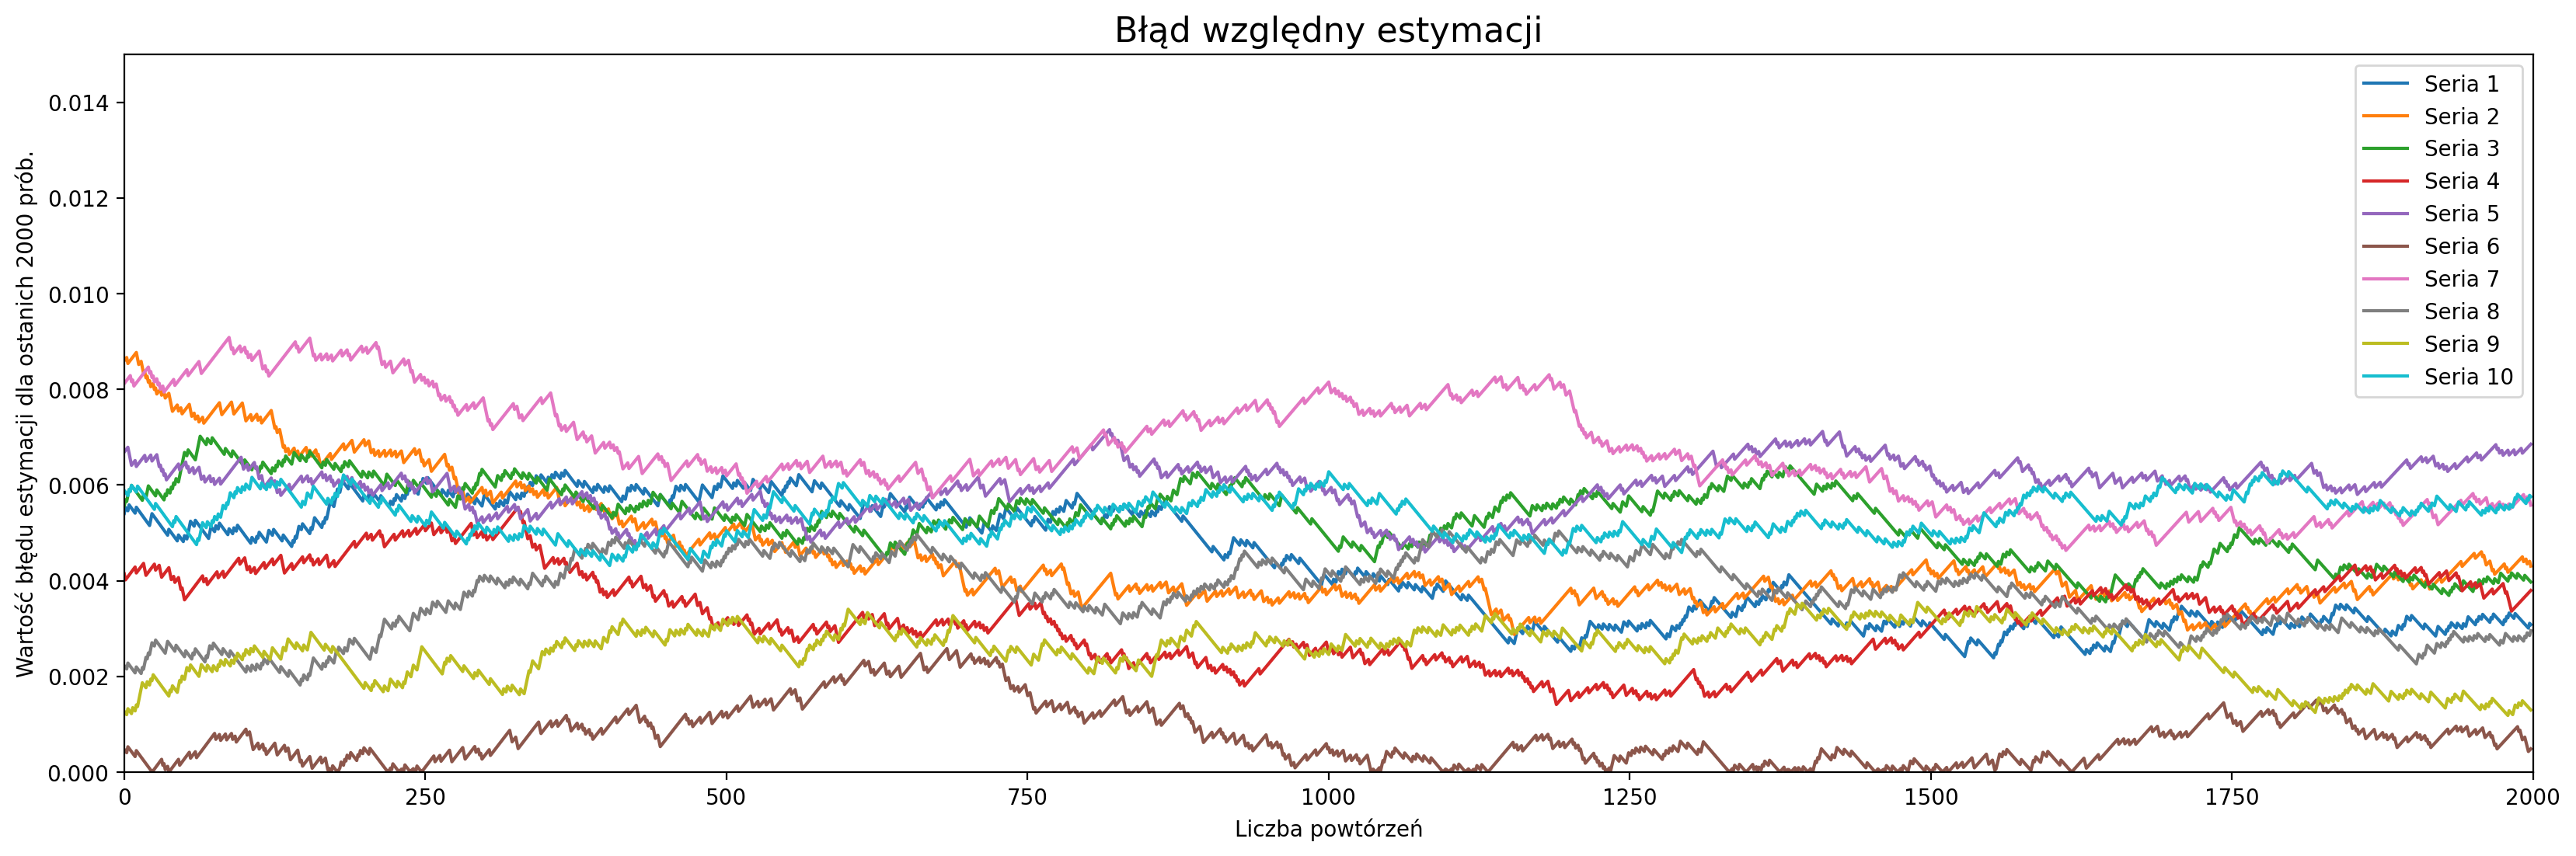

In [6]:
pi_error = abs(np.array(data_series) - np.pi) / np.pi
fig, ax = plt.subplots(figsize = (20, 6), dpi=200)
i = 1
for serie in pi_error:
    ax.plot(serie[8000:], label=f'Seria {i}')
    i += 1
ax.legend(loc='upper right') 
ax.set_xlabel("Liczba powtórzeń")
ax.set_ylabel("Wartość błędu estymacji dla ostanich 2000 prób.")
ax.set_title("Błąd względny estymacji", size=16)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 0.015)
plt.show()

Od pewnej liczby powtórzeń nie wszystkie wartości koniecznie się poprawiają, niektóre z nich były dokładniejsze przy mniejszej liczbie powtórzeń. Algorytm teoretycznie, zgodnie z jego założeniami powinien się poprawiać wraz ze wzrostem liczby powtórzeń. 

In [7]:
i = 1
for serie in pi_error:
    if serie[8000] - serie[-1] > 0:
        print(f'Seria {i} wykazuje poprawę jakości estymacji.')
    else:
        print(f'Seria {i} wykazuje pogorszenie jakości estymacji.')
    i += 1

Seria 1 wykazuje poprawę jakości estymacji.
Seria 2 wykazuje poprawę jakości estymacji.
Seria 3 wykazuje poprawę jakości estymacji.
Seria 4 wykazuje poprawę jakości estymacji.
Seria 5 wykazuje pogorszenie jakości estymacji.
Seria 6 wykazuje pogorszenie jakości estymacji.
Seria 7 wykazuje poprawę jakości estymacji.
Seria 8 wykazuje pogorszenie jakości estymacji.
Seria 9 wykazuje pogorszenie jakości estymacji.
Seria 10 wykazuje poprawę jakości estymacji.


Prawdopodobnie przy znacznie większej liczbie powtórzeń poprawi jakość każdej estymacji, jednak na powyższym etapie nie jest to oczywiste. Możliwe, że jest to kwestia psuedolosowości programu.

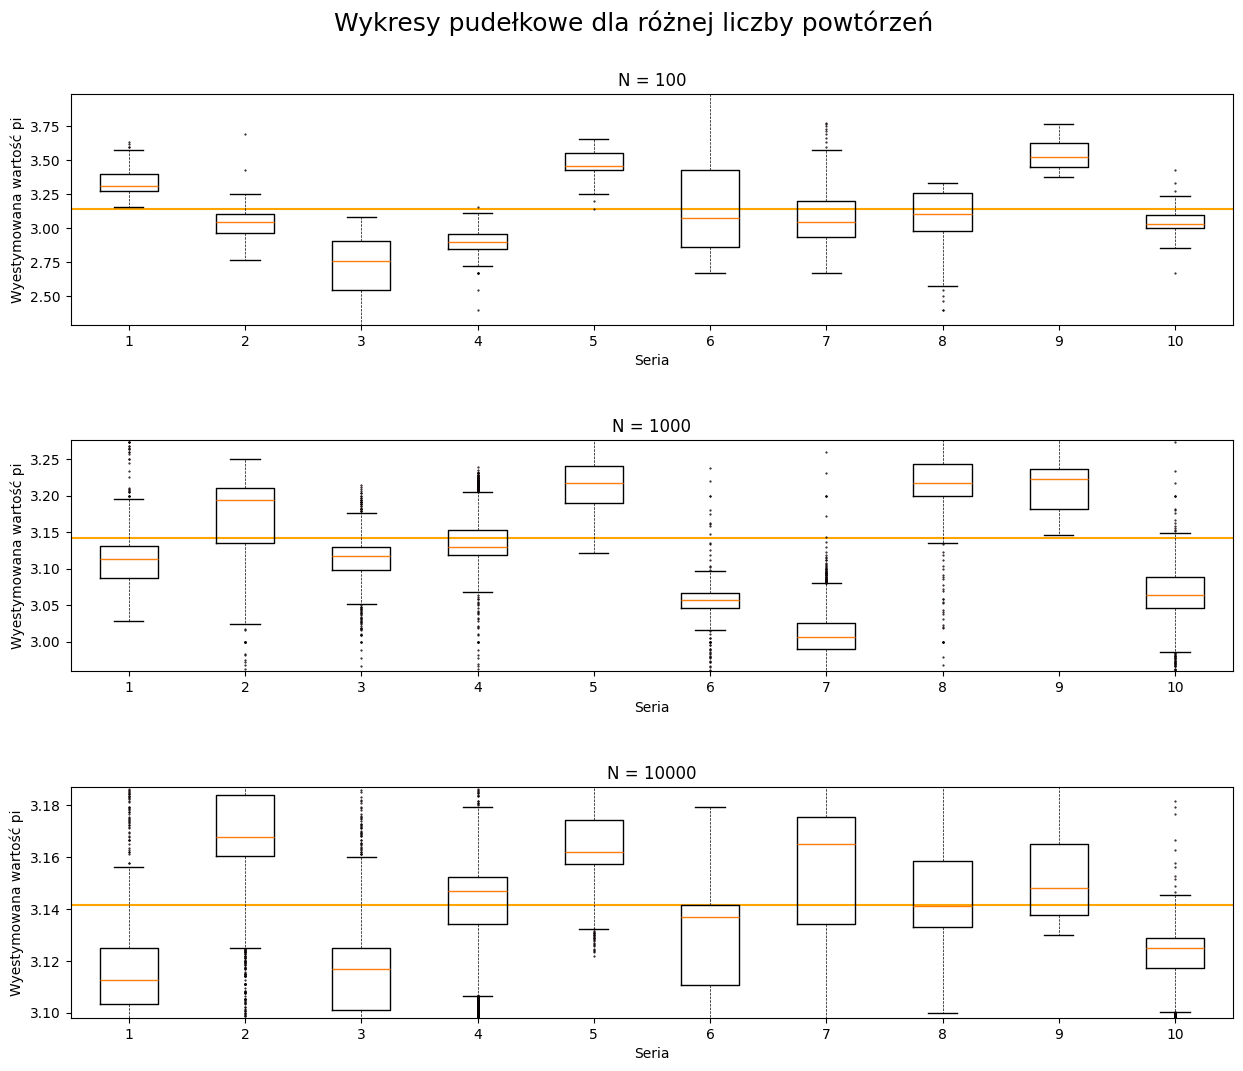

In [8]:
fig, axs = plt.subplots(3, 1, figsize = (15, 12))
plt.suptitle("Wykresy pudełkowe dla różnej liczby powtórzeń", y=0.95, size = 18)
whiskerprops = dict(color='black', linewidth=0.5, linestyle='--')
flierprops = dict(marker='o', markerfacecolor='red', markersize=0.5, linestyle='none')
n = 100
ylim = (2.8, 3.8)
for ax in axs:
    ax.axhline(y=math.pi, color='orange')
    ax.set_title(f'N = {n}')
    ax.set_ylabel("Wyestymowana wartość pi")
    ax.set_xlabel("Seria")
    ax.set_ylim((1 - 10/n) * np.min([np.percentile(serie[:n], 25) for serie in data_series]), (1 + 10/n) * np.max([np.percentile(serie[:n], 75) for serie in data_series]))
    ax.boxplot([serie[:n] for serie in data_series], whiskerprops=whiskerprops, flierprops=flierprops)
    n *= 10
plt.subplots_adjust(hspace=0.5)
plt.show()

Wykresy pudełkowe ponownie dobrze ukazują losowość algorytmu - pojedyncze serie lepiej wypadły przy mniejszej liczbie powtórzeń. Patrząc na odpowiednie sobie serie, nie zawsze można zauważyć zależności między nimi. Natomiast generalnie wraz ze wzrostem liczby powtórzeń "pudełka" zbliżają się do faktycznej wartości liczby $\pi$. Na kolejnych wykresach zajmują one też coraz mniejszy obszar bezwzględny - połowa wyestymowanych wartości jest znacznie bliżej wartości liczby $\pi$, co potwierdzają wcześniejsze wykresy.